## Análisis descriptivo de los datos

### Importación de librerías

In [1]:
import pandas as pd
import numpy as np

### Cargamos el archivo

In [2]:
df = pd.read_csv("../data/output/basededatos_limpia.csv")

### Revisamos la estructura de la base de datos

In [3]:
print("Filas y columnas:", df.shape)
df.head()

Filas y columnas: (51290, 25)


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,quantity,discount,profit,shipping_cost,order_priority,year,admin_name,latitud,longitud,poblacion
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,constantine,algeria,Africa,Africa,...,2,0.0,106.140,35.46,Medium,2011,constantine,36.355089,6.664344,878977.0
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,new south wales,australia,APAC,Oceania,...,3,0.1,36.036,9.72,Medium,2011,new south wales,-32.646250,150.196007,6379411.0
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,budapest,hungary,EMEA,EMEA,...,4,0.0,29.640,8.17,High,2011,budapest,47.498300,19.040800,1686222.0
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,stockholm,sweden,EU,North,...,3,0.5,-26.055,4.82,High,2011,stockholm,59.376200,18.033443,1652923.0
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,new south wales,australia,APAC,Oceania,...,5,0.1,37.770,4.70,Medium,2011,new south wales,-32.646250,150.196007,6379411.0


### Estadísticas generales

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,51290.0,1.527613e+02,1.990626e+02,0.000000,2.400000e+01,6.800000e+01,1.960000e+02,9.990000e+02
quantity,51290.0,3.476545e+00,2.278766e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.400000e+01
discount,51290.0,1.429075e-01,2.122799e-01,0.000000,0.000000e+00,0.000000e+00,2.000000e-01,8.500000e-01
profit,51290.0,2.864174e+01,1.744241e+02,-6599.978000,0.000000e+00,9.240000e+00,3.681000e+01,8.399976e+03
shipping_cost,51290.0,2.637592e+01,5.729680e+01,0.000000,2.610000e+00,7.790000e+00,2.445000e+01,9.335700e+02
year,51290.0,2.012777e+03,1.098931e+00,2011.000000,2.012000e+03,2.013000e+03,2.014000e+03,2.014000e+03
latitud,51290.0,2.421818e+01,2.495639e+01,-46.233750,1.330140e+01,3.113840e+01,4.182939e+01,6.204465e+01
longitud,51290.0,-4.454643e+00,8.051124e+01,-122.538006,-7.952192e+01,2.352214e+00,4.351338e+01,1.780178e+02
poblacion,51290.0,2.274745e+07,3.632386e+07,0.000000,2.942036e+06,9.944450e+06,3.221790e+07,1.360846e+09


Aquí vemos un resumen general estadístico general, donde se muestra la media, la desviación típica, los mínimos y los máximos de las variables numéricas.

### Ahora vamos a ver las ventas y el beneficio por categorías:

In [21]:
df.groupby("ship_mode")[["sales","profit"]].sum().sort_values("sales", ascending=False)

,sales,profit
ship_mode,,
Standard Class,4719603.0,890596.02120
Second Class,1583086.0,294161.05708
First Class,1133651.0,208104.67520
Same Day,398788.0,76173.06780


In [8]:
df.groupby("segment")[["sales","profit"]].sum().sort_values("sales", ascending=False)

,sales,profit
segment,,
Consumer,4058118.0,749239.78206
Corporate,2369261.0,442785.85866
Home Office,1407749.0,277009.18056


In [7]:
df.groupby("market")[["sales","profit"]].sum().sort_values("sales", ascending=False)

,sales,profit
market,,
APAC,2000746.0,437577.57900
EU,1803099.0,372829.74150
LATAM,1563126.0,221643.48708
US,1304166.0,286397.02170
EMEA,575562.0,43897.97100
Africa,538115.0,88871.63100
Canada,50314.0,17817.39000


In [6]:
df.groupby("region")[["sales","profit"]].sum().sort_values("sales", ascending=False)

,sales,profit
region,,
Central,1806638.0,311403.98164
South,1031101.0,140355.76618
North,790546.0,194597.95252
Oceania,625382.0,121666.64200
EMEA,575562.0,43897.97100
Africa,538115.0,88871.63100
Southeast Asia,532172.0,17852.32900
North Asia,453686.0,165578.42100
West,424173.0,108418.44890


In [5]:
df.groupby("category")[["sales", "profit"]].sum().sort_values("sales", ascending=False)

,sales,profit
category,,
Office Supplies,2790258.0,518473.83430
Technology,2638265.0,663778.73318
Furniture,2406605.0,286782.25380


In [9]:
df.groupby("order_priority")[["sales","profit"]].sum().sort_values("sales", ascending=False)

,sales,profit
order_priority,,
Medium,4491457.0,864203.76262
High,2365250.0,420373.51340
Critical,598854.0,125801.69428
Low,379567.0,58655.85098


In [10]:
df.groupby("year")[["sales","profit"]].sum().sort_values("sales", ascending=False)

,sales,profit
year,,
2014,2668457.0,504165.97046
2013,2107021.0,408512.76018
2012,1681499.0,307415.27910
2011,1378151.0,248940.81154


### Visualizaciones rápidas

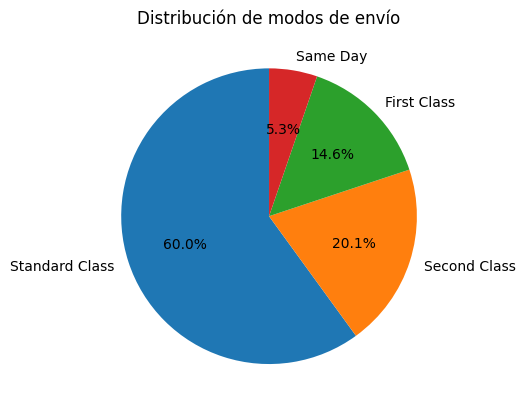

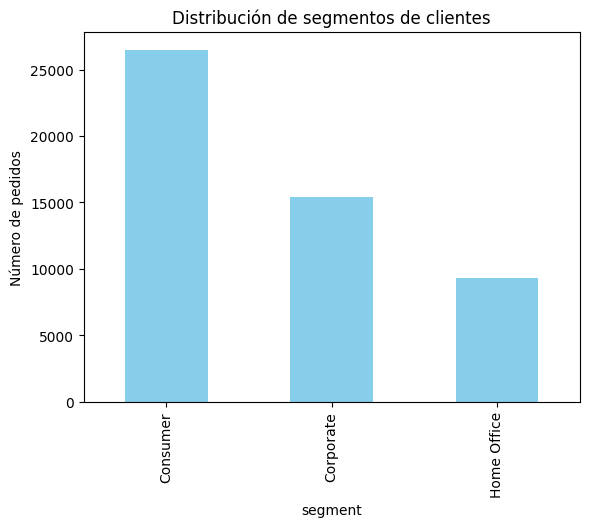

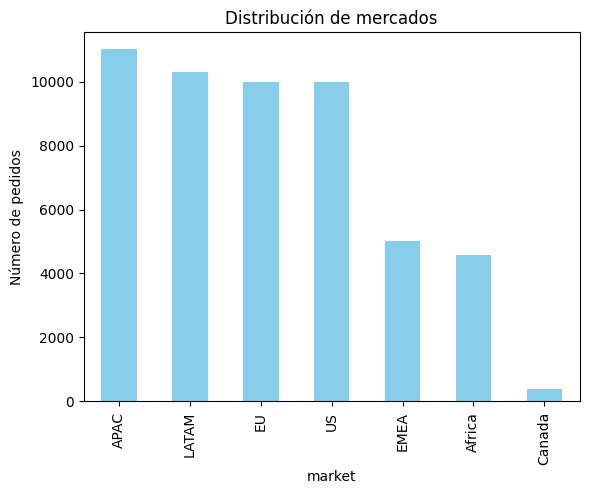

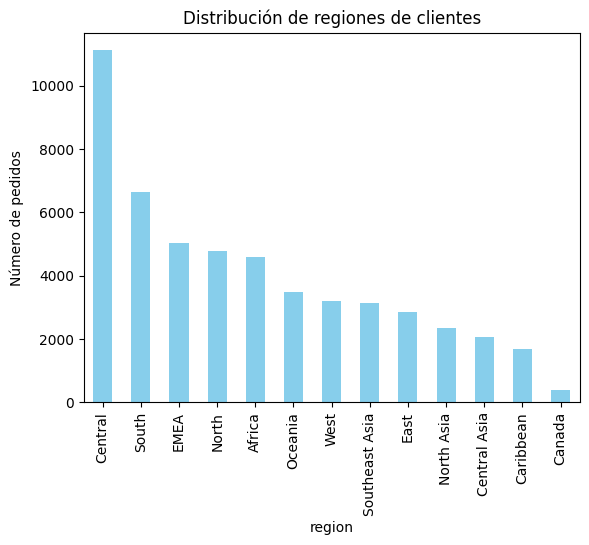

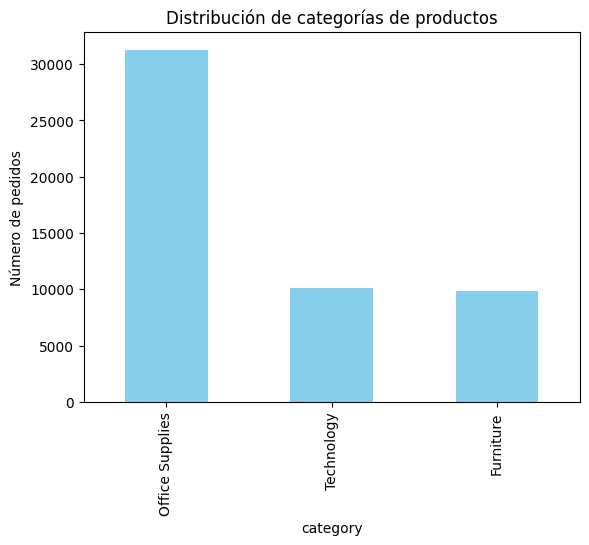

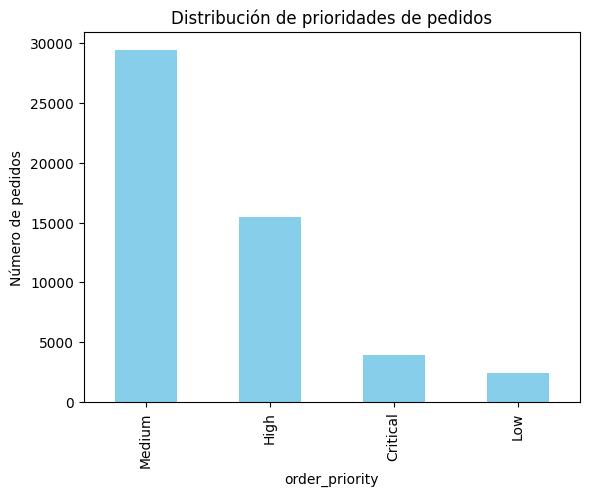

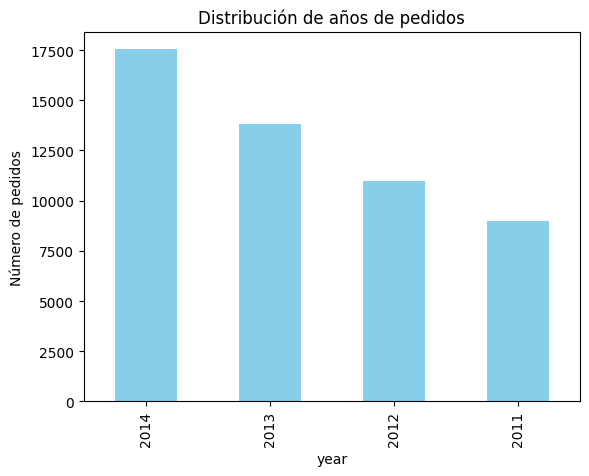

In [29]:
import matplotlib.pyplot as plt

# Modo de envío de los pedidos
df["ship_mode"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribución de modos de envío")
plt.ylabel("")
plt.show()

# Segmentos de clientes que piden
df["segment"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribución de segmentos de clientes")
plt.ylabel("Número de pedidos")
plt.show()

# Mercados
df["market"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribución de mercados")
plt.ylabel("Número de pedidos")
plt.show()

# Regiones del cliente
df["region"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribución de regiones de clientes")
plt.ylabel("Número de pedidos")
plt.show()

# Categorías de pedidos
df["category"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribución de categorías de productos")
plt.ylabel("Número de pedidos")
plt.show()

# Orden de prioridad de los pedidos
df["order_priority"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribución de prioridades de pedidos")
plt.ylabel("Número de pedidos")
plt.show()

# Año en cual se realizaron los pedidos
df["year"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribución de años de pedidos")
plt.ylabel("Número de pedidos")
plt.show()

No hacemos de estados y países de los clientes porque no caben todos en la gráfica.

### Márgenes de beneficio

In [11]:
df["margen"] = (df["profit"] / df["sales"]) * 100
df["margen"].describe()

c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    5.126000e+04
mean              NaN
std               NaN
min              -inf
25%      0.000000e+00
50%      1.797989e+01
75%      3.505895e+01
max               inf
Name: margen, dtype: float64

Para conocer el margen medio de la empresa y los valores extremos.

### Correlaciones (relaciones entre variables numéricas)

In [23]:
corr = df[["sales", "quantity", "discount", "profit", "shipping_cost", "year", "latitud", "longitud", "poblacion"]].corr()
corr

,sales,quantity,discount,profit,shipping_cost,year,latitud,longitud,poblacion
sales,1.000000,0.212839,-0.093448,0.059167,0.250751,-0.002116,-0.010426,0.061648,0.034963
quantity,0.212839,1.000000,-0.019875,0.104743,0.272649,-0.005049,-0.003765,-0.045390,0.038426
discount,-0.093448,-0.019875,1.000000,-0.316375,-0.079056,-0.005894,-0.097933,0.020796,-0.051181
profit,0.059167,0.104743,-0.316375,1.000000,0.357033,0.002661,0.025125,0.021348,0.025617
shipping_cost,0.250751,0.272649,-0.079056,0.357033,1.000000,-0.003136,-0.006364,0.063730,0.029663
year,-0.002116,-0.005049,-0.005894,0.002661,-0.003136,1.000000,-0.005980,0.012664,-0.010027
latitud,-0.010426,-0.003765,-0.097933,0.025125,-0.006364,-0.005980,1.000000,-0.339565,0.139378
longitud,0.061648,-0.045390,0.020796,0.021348,0.063730,0.012664,-0.339565,1.000000,0.100934
poblacion,0.034963,0.038426,-0.051181,0.025617,0.029663,-0.010027,0.139378,0.100934,1.000000
